In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
passengers = pd.read_csv('AirPassengers.csv',index_col=0)
y = passengers['Passengers']

In [3]:
y_train = y[:132]
y_test = y[132:]
y_train.shape , y_test.shape

((132,), (12,))

#### Rolling Mean Forecast (Simple Rolling Average)

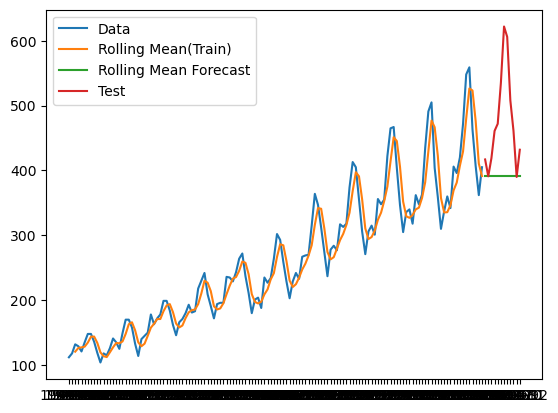

In [4]:
span = 3
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)) ,index=y_test.index)
plt.plot(y_train,label='Data')
plt.plot(fcast,label='Rolling Mean(Train)')
plt.plot(MA_fcast,label='Rolling Mean Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

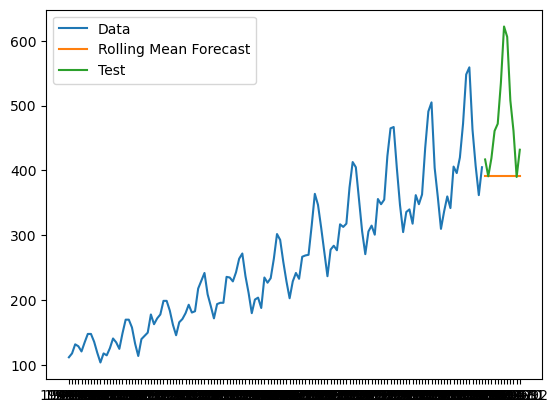

In [5]:
plt.plot(y_train,label='Data')
plt.plot(MA_fcast,label='Rolling Mean Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

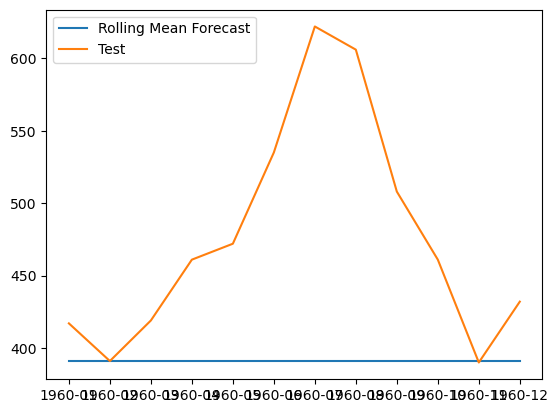

In [6]:
plt.plot(MA_fcast,label='Rolling Mean Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

In [13]:
from sklearn.metrics import root_mean_squared_error

In [14]:
span = 3
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)) , index = y_test.index)
root_mean_squared_error(y_test,MA_fcast)

112.85462625283321

In [15]:
span = 7
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)) , index = y_test.index)
root_mean_squared_error(y_test,MA_fcast)

76.28653914303472

#### Simple Exponential Smoothing

In [16]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [35]:
alpha = 0.2
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


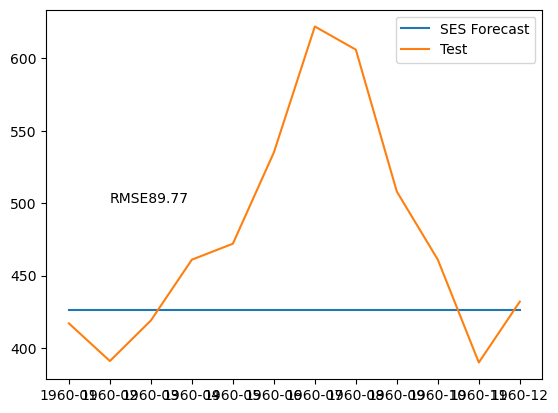

In [36]:
ses_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,ses_fcast) ,2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(ses_fcast,label='SES Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Holt's Linear Trend Method

In [37]:
from statsmodels.tsa.api import Holt

In [38]:
holt = Holt(y_train)
alpha , beta = 0.2,0.4
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


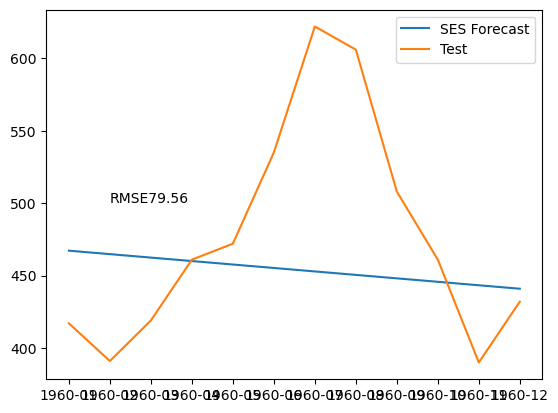

In [39]:
holt_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,holt_fcast) ,2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(holt_fcast,label='SES Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Holt's Exponential Trend Method

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


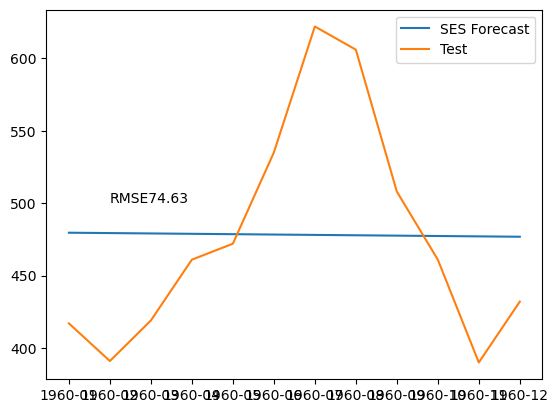

In [40]:
holt = Holt(y_train,exponential=True)
alpha , beta = 0.2,0.4
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1=fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,holt_fcast) ,2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(holt_fcast,label='SES Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Additive Damped trend

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


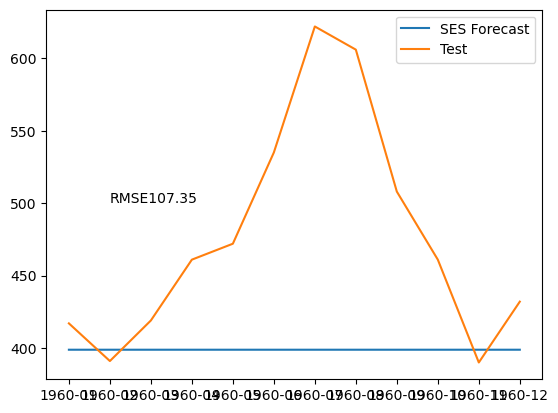

In [41]:
alpha ,beta , phi= 0.8,0.02,0.1
add_damp = Holt(y_train , damped_trend=True)
fit3 = add_damp.fit(smoothing_level=alpha,smoothing_trend=beta,damping_trend=phi)
fcast3=fit3.forecast(len(y_test))
damp_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,damp_fcast) ,2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(damp_fcast,label='SES Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Multiplicative Damped trend

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


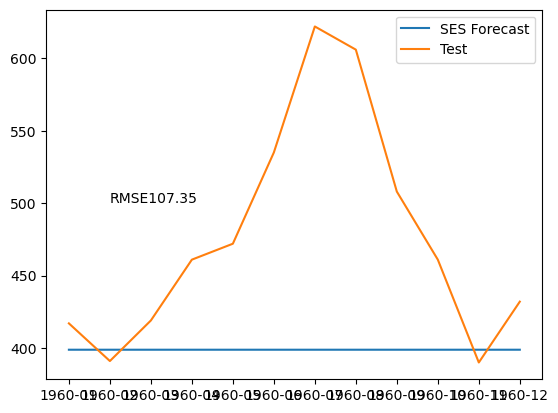

In [43]:
alpha ,beta , phi= 0.8,0.02,0.1
add_damp = Holt(y_train , damped_trend=True)
fit3 = add_damp.fit(smoothing_level=alpha,smoothing_trend=beta,damping_trend=phi)
fcast3=fit3.forecast(len(y_test))
damp_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,damp_fcast) ,2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(damp_fcast,label='SES Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Holt - Winters Additive Trend

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


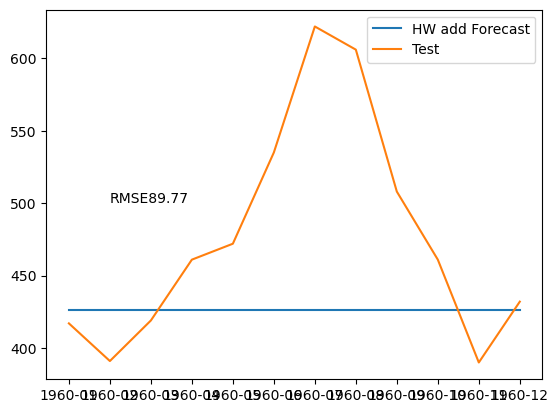

In [58]:
alpha ,beta , gamma= 0.2,0.7,0.7
hw_a = ExponentialSmoothing(y_train)
fit3 = hw_a.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast3=fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_a_fcast) ,2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_a_fcast,label='HW add Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Holt - Winters Additive Trend¶

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


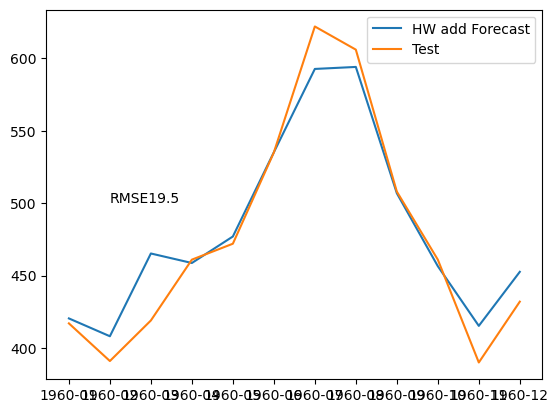

In [63]:
alpha ,beta , gamma= 0.2,0.1,0.4
hw_a = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')
fit3 = hw_a.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast3=fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_a_fcast) ,2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_a_fcast,label='HW add Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Auto tuning
##### here if we dont specify the parameters it takes best parameters on its own

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


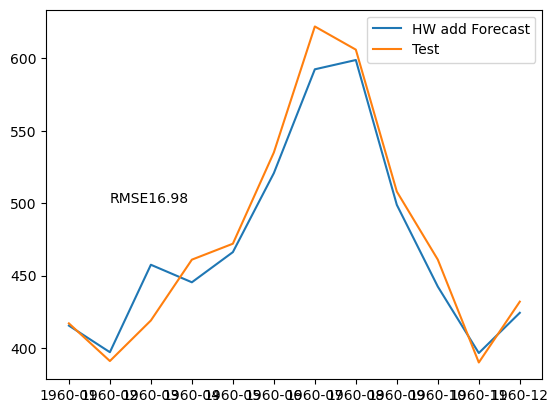

In [68]:
hw_a = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')
fit3 = hw_a.fit()
fcast3=fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_a_fcast) ,2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_a_fcast,label='HW add Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Best Parameters resulted through auto-tuning

In [69]:
hw_a.params['smoothing_level'],hw_a.params['smoothing_trend'],hw_a.params['smoothing_seasonal']

(0.2511602380805673, 0.0, 0.7488397619194327)

#### Holt - Winters Multiplicative Trend

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


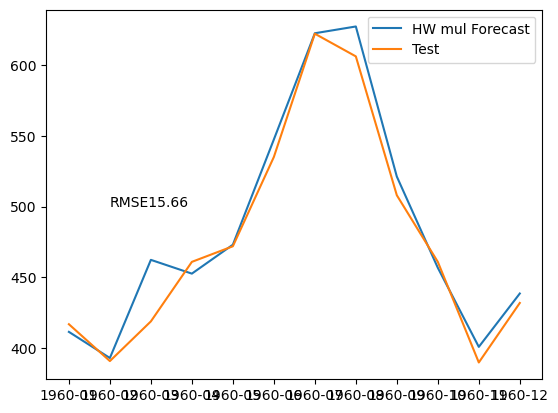

In [72]:
alpha ,beta , gamma= 0.2,0.1,0.4
hw_ml = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='mul')
fit3 = hw_ml.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast3=fit3.forecast(len(y_test))
hw_ml_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_ml_fcast) ,2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_ml_fcast,label='HW mul Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Damped + Holt-Winters

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


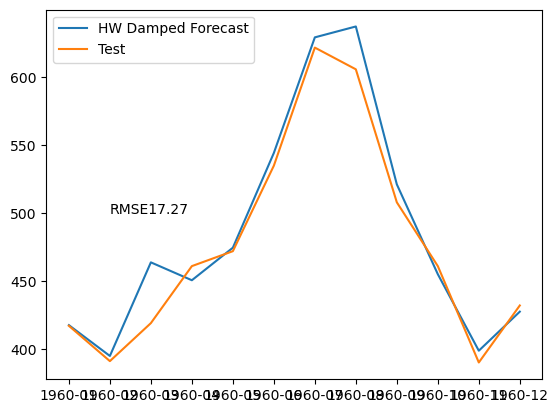

In [74]:
hw_ml = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='mul',damped_trend=True)
fit3 = hw_ml.fit()
fcast3=fit3.forecast(len(y_test))
hw_ml_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_ml_fcast) ,2)
plt.text(1,500,"RMSE"+str(error))
plt.plot(hw_ml_fcast,label='HW Damped Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()